In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/efficientnetb3-pneumonia-stage3/efficientnetb3_pneumonia_stage3.h5
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS


train:
  PNEUMONIA: 3875 files
  NORMAL: 1341 files

test:
  PNEUMONIA: 390 files
  NORMAL: 234 files

val:
  PNEUMONIA: 8 files
  NORMAL: 8 files


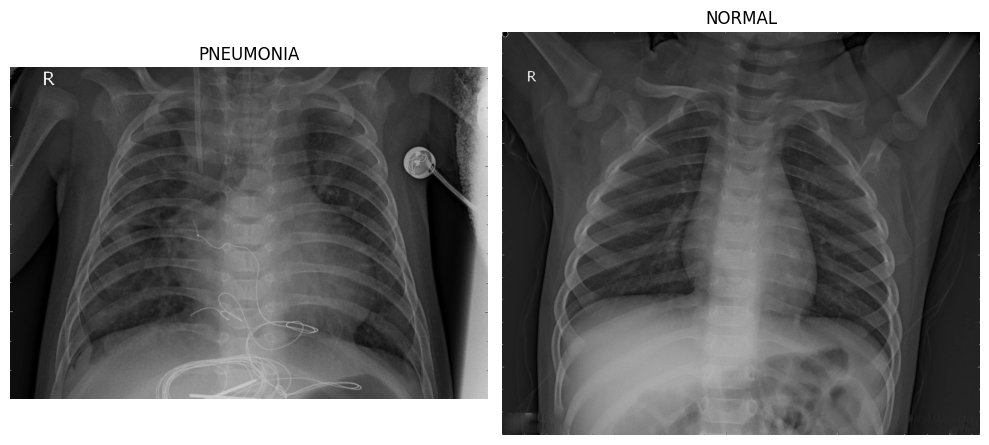

Hoàn thành chia dữ liệu!

Bảng thống kê dữ liệu:
Split      train  val  test  Total
Category                          
NORMAL      1214  135   234   1583
PNEUMONIA   3494  389   390   4273
Total       4708  524   624   5856


In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

base_path = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Display directory structure
for root_dir in ['train', 'test', 'val']:
    path = os.path.join(base_path, root_dir)
    if os.path.exists(path):
        print(f"\n{root_dir}:")
        for category in os.listdir(path):
            category_path = os.path.join(path, category)
            if os.path.isdir(category_path):
                num_files = len(os.listdir(category_path))
                print(f"  {category}: {num_files} files")


from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Load and display PNEUMONIA image
pneumonia_path = os.path.join(base_path, 'train/PNEUMONIA')
pneumonia_img = Image.open(os.path.join(pneumonia_path, os.listdir(pneumonia_path)[0])).convert('L')
axes[0].imshow(pneumonia_img, cmap='gray')
axes[0].set_title('PNEUMONIA')
axes[0].axis('off')

# Load and display NORMAL image
normal_path = os.path.join(base_path, 'train/NORMAL')
normal_img = Image.open(os.path.join(normal_path, os.listdir(normal_path)[0])).convert('L')
axes[1].imshow(normal_img, cmap='gray')
axes[1].set_title('NORMAL')
axes[1].axis('off')

plt.tight_layout()
plt.show()

import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn gốc
original_train = os.path.join(base_path, 'train')
original_val = os.path.join(base_path, 'val')

# Tạo thư mục mới cho train và val
new_base = 'chest_xray_split'
os.makedirs(new_base, exist_ok=True)

for category in ['NORMAL', 'PNEUMONIA']:
    os.makedirs(os.path.join(new_base, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(new_base, 'val', category), exist_ok=True)

# Gộp train và val cũ, sau đó chia lại 9:1
for category in ['NORMAL', 'PNEUMONIA']:
    # Lấy tất cả file từ train và val cũ
    all_files = []
    
    train_cat = os.path.join(original_train, category)
    if os.path.exists(train_cat):
        all_files.extend([os.path.join(train_cat, f) for f in os.listdir(train_cat)])
    
    val_cat = os.path.join(original_val, category)
    if os.path.exists(val_cat):
        all_files.extend([os.path.join(val_cat, f) for f in os.listdir(val_cat)])
    
    # Chia lại 9:1
    train_files, val_files = train_test_split(all_files, test_size=0.1, random_state=42)
    
    # Copy file vào thư mục mới
    for f in train_files:
        shutil.copy(f, os.path.join(new_base, 'train', category, os.path.basename(f)))
    
    for f in val_files:
        shutil.copy(f, os.path.join(new_base, 'val', category, os.path.basename(f)))

# Copy test giữ nguyên
shutil.copytree(os.path.join(base_path, 'test'), os.path.join(new_base, 'test'), dirs_exist_ok=True)

print("Hoàn thành chia dữ liệu!")


# Tạo bảng thống kê
data = []
for split in ['train', 'val', 'test']:
    for category in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(new_base, split, category)
        count = len(os.listdir(path))
        data.append({'Split': split, 'Category': category, 'Count': count})

df = pd.DataFrame(data)
df_pivot = df.pivot(index='Category', columns='Split', values='Count')
df_pivot = df_pivot[['train', 'val', 'test']]  # Sắp xếp cột
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot.loc['Total'] = df_pivot.sum()

print("\nBảng thống kê dữ liệu:")
print(df_pivot)


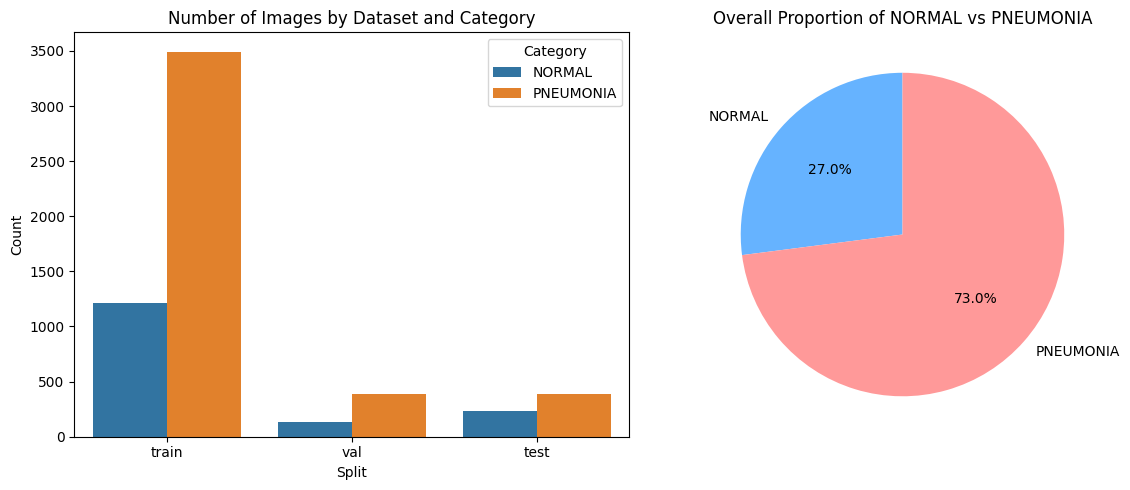

In [6]:
import seaborn as sns

# 1. Trực quan hóa phân phối dữ liệu
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Split', y='Count', hue='Category')
plt.title('Number of Images by Dataset and Category')

plt.subplot(1, 2, 2)
# Tính tổng số lượng cho mỗi loại
total_counts = df.groupby('Category')['Count'].sum()
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Overall Proportion of NORMAL vs PNEUMONIA')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

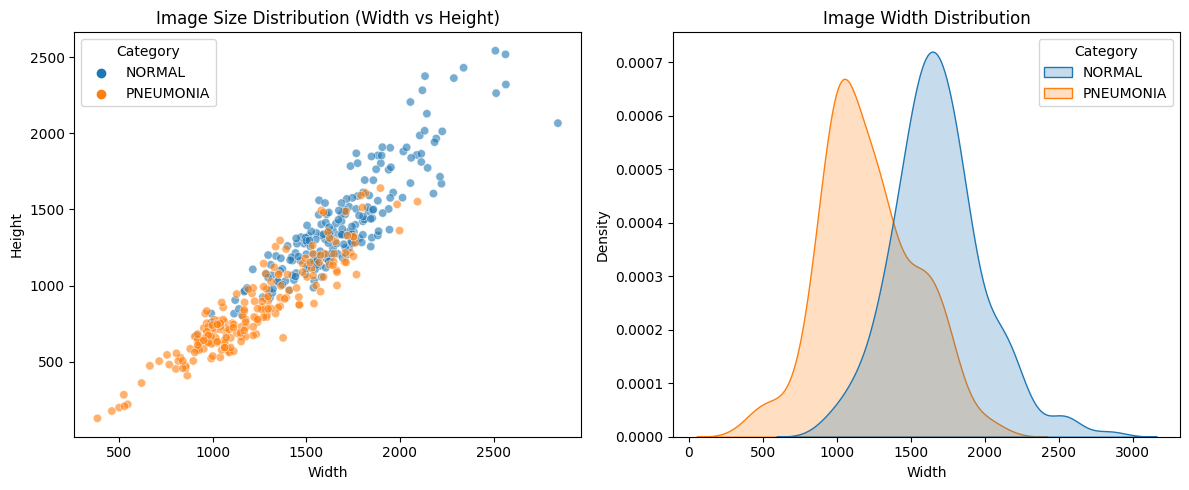

Thống kê kích thước ảnh:
           Width                                                              \
           count     mean         std    min     25%     50%     75%     max   
Category                                                                       
NORMAL     200.0  1682.60  307.106876  912.0  1500.0  1669.0  1845.0  2844.0   
PNEUMONIA  200.0  1214.19  317.601539  384.0   999.5  1169.0  1418.0  2094.0   

          Height                                                                
           count      mean         std    min     25%     50%      75%     max  
Category                                                                        
NORMAL     200.0  1400.385  353.482071  672.0  1176.0  1333.5  1557.75  2543.0  
PNEUMONIA  200.0   840.030  294.575956  127.0   638.0   776.0  1056.00  1640.0  


In [7]:
# 2. Phân tích kích thước ảnh
# Sử dụng dữ liệu từ thư mục mới đã chia
train_dir = os.path.join(new_base, 'train')

dims = []
# Lấy mẫu 200 ảnh mỗi loại để phân tích cho nhanh
for category in ['NORMAL', 'PNEUMONIA']:
    cat_path = os.path.join(train_dir, category)
    if os.path.exists(cat_path):
        files = os.listdir(cat_path)[:200]
        for f in files:
            try:
                img_path = os.path.join(cat_path, f)
                with Image.open(img_path) as img:
                    width, height = img.size
                    dims.append([category, width, height])
            except Exception as e:
                pass

df_dims = pd.DataFrame(dims, columns=['Category', 'Width', 'Height'])

if not df_dims.empty:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_dims, x='Width', y='Height', hue='Category', alpha=0.6)
    plt.title('Image Size Distribution (Width vs Height)')
    # title english: 'Image Size Distribution (Width vs Height)'
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df_dims, x='Width', hue='Category', fill=True)
    plt.title('Image Width Distribution')
    
    plt.tight_layout()
    plt.show()
    
    print("Thống kê kích thước ảnh:")
    print(df_dims.groupby('Category').describe())
else:
    print("Không tìm thấy ảnh để phân tích kích thước.")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


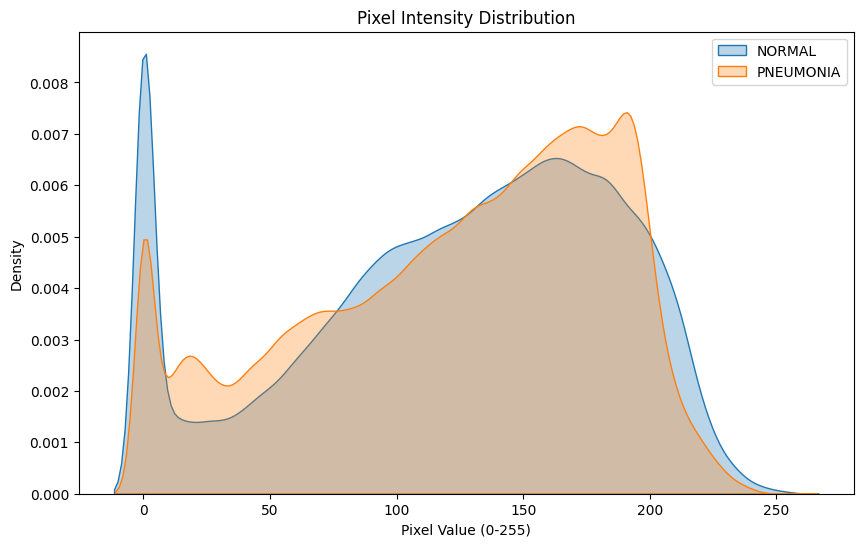

In [ ]:
# 3. Phân tích cường độ điểm ảnh (Pixel Intensity)
# So sánh histogram trung bình của hai loại

intensities = {'NORMAL': [], 'PNEUMONIA': []}

for category in ['NORMAL', 'PNEUMONIA']:
    cat_path = os.path.join(train_dir, category)
    if os.path.exists(cat_path):
        files = os.listdir(cat_path)[:50] # Lấy mẫu 50 ảnh
        for f in files:
            try:
                img_path = os.path.join(cat_path, f)
                with Image.open(img_path).convert('L') as img: # Chuyển sang grayscale
                    img = img.resize((150, 150)) # Resize để giảm tính toán
                    data = np.array(img).flatten()
                    intensities[category].extend(data)
            except:
                pass

plt.figure(figsize=(10, 6))
for cat, data in intensities.items():
    if len(data) > 0:
        sns.kdeplot(data, label=cat, fill=True, alpha=0.3)

plt.title('Pixel Intensity Distribution')
# title vietnamese: 'Phân phối cường độ điểm ảnh (Pixel Intensity)'
plt.xlabel('Pixel Value (0-255)')
plt.legend()
plt.show()